# Cleaning data and the skies

## 📖 Background
Your are a data analyst at an environmental company. Your task is to evaluate ozone pollution across various regions.

You’ve obtained data from the U.S. Environmental Protection Agency (EPA), containing daily ozone measurements at monitoring stations across California. However, like many real-world datasets, it’s far from clean: there are missing values, inconsistent formats, potential duplicates, and outliers.

Before you can provide meaningful insights, you must clean and validate the data. Only then can you analyze it to uncover trends, identify high-risk regions, and assess where policy interventions are most urgently needed.

## 💾 The data
The data is a modified dataset from the U.S. Environmental Protection Agency ([EPA](https://www.epa.gov/outdoor-air-quality-data/download-daily-data)). 

#### Ozone contains the daily air quality summary statistics by monitor for the state of California for 2024. Each row contains the date and the air quality metrics per collection method and site
- "Date" - the calendar date with which the air quality values are associated
- "Source" - the data source: EPA's Air Quality System (AQS), or Airnow reports
- "Site ID" - the id for the air monitoring site
- "POC" - the id number for the monitor
- "Daily Max 8-hour Ozone Concentration" - the highest 8-hour value of the day for ozone concentration
- "Units" - parts per million by volume (ppm)
- "Daily AQI Value" - the highest air quality index value for the day, telling how clean or polluted the air is (a value of 50 represents good air quality, while a value above 300 is hazardous)
- "Local Site Name" - name of the monitoring site
- "Daily Obs Count" - number of observations reported in that day
- "Percent Complete" - indicates whether all expected samples were collected
- "Method Code" - identifier for the collection method
- "CBSA Code" - identifier for the core base statistical area (CBSA)
- "CBSA Name" - name of the core base statistical area
- "State FIPS Code" - identifier for the state
- "State" - name of the state
- "County FIPS Code" - identifer for the county
- "County" - name of the county
- "Site Latitude" - latitude coordinates of the site
- "Site Longitude" - longitude coordinates of the side

# Evaluating Ozone Pollution in California: A Data-Driven Analysis

### 1. Executive Summary

This project transformed a raw, unreliable EPA dataset into a high-quality analytical asset to guide environmental policy. The initial data, containing over 54,000 records, was unusable due to missing values and inconsistent formatting. After a rigorous data cleaning and validation process, we retained **52,021 high-integrity records** (a 95% retention rate) to conduct our analysis.

The analysis revealed that California's ozone pollution is **not random; it is highly predictable and geographically concentrated.**

**Key Findings:**

1.  **It's a "When" Problem (Temporal):** Ozone pollution is overwhelmingly a **seasonal, summer phenomenon**, with average concentrations **36.6% higher** than in winter. A smaller, but measurable, **0.9% increase on weekdays** points to the impact of urban traffic and industrial activity.
2.  **It's a "Where" Problem (Geospatial):** The problem is not statewide. It is hyper-concentrated in two "hotspots": **Southern California** (San Bernardino, Riverside counties) and the **Central Valley** (Tulare, Kern counties). Our interactive map clearly visualizes these regions, which consistently approach or exceed "Moderate" EPA thresholds, while coastal areas remain clear.
3.  **It's a "How" Problem (Data Integrity):** We found systemic discrepancies between monitoring methods, with `Method Code 199.0` **consistently under-reporting** ozone levels, potentially causing an underestimation of risk in those areas.

**Business Recommendations:**

Based on these findings, we recommend a targeted, three-part strategy:
* **Policy:** Focus all policy interventions and public health alerts on the identified **hotspot counties** during the **summer season**.
* **Monitoring:** Launch an immediate **audit of monitoring protocols** to standardize all measurement methods.
* **Future Work:** Build a **predictive model** by integrating this data with meteorological data (e.g., temperature) to create an early warning system.

### 2. The Business Challenge: Identifying Pollution Drivers

This analysis serves an environmental company tasked with evaluating ozone pollution. The raw EPA data is plagued by missing values, inconsistent date formats, and potential outliers, making accurate assessment impossible.

Our goal is to clean, validate, and analyze this data to provide a clear, data-driven answer to where and when ozone pollution is worst.

**The Key Questions:**
1.  How do ozone levels vary by time (seasonally, daily) and region?
2.  Where are the consistent high-risk hotspots?
3.  Do different measurement methods create data integrity issues?
4.  Does urban activity (weekday vs. weekend) have a measurable impact?

In [23]:
# Import core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set notebook-specific configurations
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### 3. Data Cleaning & Validation: Building a Trustworthy Foundation

Before any analysis, we must first build a trustworthy foundation. The raw data cannot be used until we address its core issues. Our process consists of four methodical steps.

In [38]:
# Load the dataset from the CSV file
df = pd.read_csv('data/ozone.csv')

# Initial Data Inspection

# 1. Display the first 5 rows to understand the structure
print("First 5 Rows of the Data:")
display(df.head())

# 2. Display a summary of all columns, their types, and non-null counts
print("\nDataframe Info (Column Types & Non-Nulls):")
df.info()

# 3. Display the count of missing values in each column
print("\nMissing Value Counts:")
display(df.isnull().sum())

First 5 Rows of the Data:


,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217



Dataframe Info (Column Types & Non-Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           

Date                                       0
Source                                     0
Site ID                                    0
POC                                        0
Daily Max 8-hour Ozone Concentration    2738
Units                                      0
Daily AQI Value                         2738
Local Site Name                            0
Daily Obs Count                            0
Percent Complete                           0
Method Code                             6490
CBSA Code                               2408
CBSA Name                               2408
County FIPS Code                           0
County                                     0
Site Latitude                              0
Site Longitude                             0
dtype: int64

**Analysis of Initial Inspection:**

The `df.info()` and `df.isnull().sum()` commands immediately confirm our challenge:
1.  **Date Column Issue**: The `Date` column is an `object` (text), not a date. This is due to inconsistent formats and makes time-series analysis impossible.
2.  **Missing Ozone Data**: The `'Daily Max 8-hour Ozone Concentration'` column has over 2,700 missing values that must be handled.
3.  **Messy Column Names**: Columns use spaces and long titles, which are inefficient and error-prone.

We will now fix these issues.

In [39]:
# Create a dictionary to map old column names to new, clean names
column_mapping = {
    'Date': 'date',
    'Source': 'source',
    'Site ID': 'site_id',
    'POC': 'poc',
    'Daily Max 8-hour Ozone Concentration': 'ozone_max',
    'Units': 'units',
    'Daily AQI Value': 'aqi',
    'Local Site Name': 'site_name',
    'Daily Obs Count': 'obs_count',
    'Percent Complete': 'percent_complete',
    'Method Code': 'method_code',
    'CBSA Code': 'cbsa_code',
    'CBSA Name': 'cbsa_name',
    'County FIPS Code': 'county_fips',
    'County': 'county',
    'Site Latitude': 'latitude',
    'Site Longitude': 'longitude'
}

# Apply the renaming to our DataFrame
df = df.rename(columns=column_mapping)

# Verification Step
# Display the first 5 rows again to confirm the new, clean column names
print("DataFrame with Cleaned Column Names:")
display(df.head())

DataFrame with Cleaned Column Names:


,date,source,site_id,poc,ozone_max,units,aqi,site_name,obs_count,percent_complete,method_code,cbsa_code,cbsa_name,county_fips,county,latitude,longitude
0,/2024,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
1,01/02/2024,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
2,/2024,AQS,60010007,1,NaN,ppm,30.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
3,January 04/2024,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217
4,January 05/2024,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217


In [40]:
# Task 3: Convert 'date' column

# 1. Apply pd.to_datetime to the 'date' column
# 'errors='coerce'' will turn any unparseable dates (like '/2024') into NaT (Not a Time)
# 'format='mixed'' will attempt to parse multiple date formats (like 'MM/DD/YYYY' and 'Month DD/YYYY')
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce')

# Verification Step
print("Dataframe Info after Date Conversion:")
# 1. Display the info to confirm 'date' column is now datetime64[ns]
df.info()

print("\nMissing Value Counts after Date Conversion:")
# 2. Display the null counts again.
# We expect to see new NaT values in the 'date' column from the unparseable dates.
display(df.isnull().sum())

Dataframe Info after Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              54759 non-null  datetime64[ns]
 1   source            54759 non-null  object        
 2   site_id           54759 non-null  int64         
 3   poc               54759 non-null  int64         
 4   ozone_max         52021 non-null  float64       
 5   units             54759 non-null  object        
 6   aqi               52021 non-null  float64       
 7   site_name         54759 non-null  object        
 8   obs_count         54759 non-null  int64         
 9   percent_complete  54759 non-null  float64       
 10  method_code       48269 non-null  float64       
 11  cbsa_code         52351 non-null  float64       
 12  cbsa_name         52351 non-null  object        
 13  county_fips       54759 non-null  int6

date                   0
source                 0
site_id                0
poc                    0
ozone_max           2738
units                  0
aqi                 2738
site_name              0
obs_count              0
percent_complete       0
method_code         6490
cbsa_code           2408
cbsa_name           2408
county_fips            0
county                 0
latitude               0
longitude              0
dtype: int64

**Cleaning & Validation Summary:**

We have successfully created our validated dataset.
* All column names are now clean and standardized (e.g., `ozone_max`).
* The `date` column is now a proper `datetime64` object.
* All rows with missing critical data have been dropped, leaving us with **52,021 validated records** (95.0% of the original data).

All subsequent analysis is built on this high-quality foundation.

In [41]:
# Task 4: Handle Missing Data

# 1. Get the number of rows *before* dropping
original_row_count = len(df)
print(f"Original row count: {original_row_count}")

# 2. Drop rows where 'date' OR 'ozone_max' is missing
df = df.dropna(subset=['date', 'ozone_max'])

# Verification Step
# 3. Get the number of rows *after* dropping
final_row_count = len(df)
print(f"Final row count after dropping: {final_row_count}")

# 4. Calculate and report the impact
rows_dropped = original_row_count - final_row_count
percent_retained = (final_row_count / original_row_count) * 100
print(f"Total rows dropped: {rows_dropped}")
print(f"Percentage of data retained: {percent_retained:.1f}%")

print("\nFinal Missing Value Check:")
# 5. Final check to confirm all NaNs in key columns are gone
display(df.isnull().sum())

Original row count: 54759
Final row count after dropping: 52021
Total rows dropped: 2738
Percentage of data retained: 95.0%

Final Missing Value Check:


date                   0
source                 0
site_id                0
poc                    0
ozone_max              0
units                  0
aqi                 2602
site_name              0
obs_count              0
percent_complete       0
method_code         6188
cbsa_code           2282
cbsa_name           2282
county_fips            0
county                 0
latitude               0
longitude              0
dtype: int64

### 4. Exploratory Data Analysis (EDA)

With a clean dataset, we can now begin our analysis. We will start by engineering new features from our `date` column and then explore the overall distribution of our main variable, `ozone_max`.

In [42]:
# Section 4: EDA (Part 1: Feature Engineering)

# 1. Extract 'month' (as a number 1-12) from the 'date'
df['month'] = df['date'].dt.month

# 2. Extract 'day_of_week' (as a string like 'Monday')
df['day_of_week'] = df['date'].dt.day_name()

# 3. Create a boolean 'is_weekend' column (True/False)
# This will be very useful for the weekday/weekend analysis
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# 4. Create a 'season' column based on the month
# Using meteorological seasons for this analysis
season_map = {
    1: 'Winter', 2: 'Winter', 12: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}
df['season'] = df['month'].map(season_map)

# Verification Step
print("DataFrame with New Engineered Features:")
# Display the first 5 rows to show the new columns
display(df.head())

print("\nUpdated Dataframe Info:")
# Display info to confirm new columns and their types
df.info()

DataFrame with New Engineered Features:


,date,source,site_id,poc,ozone_max,units,aqi,site_name,obs_count,percent_complete,method_code,cbsa_code,cbsa_name,county_fips,county,latitude,longitude,month,day_of_week,is_weekend,season
0,2024-01-01,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Monday,False,Winter
1,2024-01-02,AQS,60010007,1,0.037,ppm,34.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Tuesday,False,Winter
3,2024-01-04,AQS,60010007,1,0.026,ppm,24.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Thursday,False,Winter
4,2024-01-05,AQS,60010007,1,0.027,ppm,25.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Friday,False,Winter
5,2024-01-06,AQS,60010007,1,0.031,ppm,29.0,Livermore,17,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1,Alameda,37.687526,-121.784217,1,Saturday,True,Winter



Updated Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 52021 entries, 0 to 54757
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              52021 non-null  datetime64[ns]
 1   source            52021 non-null  object        
 2   site_id           52021 non-null  int64         
 3   poc               52021 non-null  int64         
 4   ozone_max         52021 non-null  float64       
 5   units             52021 non-null  object        
 6   aqi               49419 non-null  float64       
 7   site_name         52021 non-null  object        
 8   obs_count         52021 non-null  int64         
 9   percent_complete  52021 non-null  float64       
 10  method_code       45833 non-null  float64       
 11  cbsa_code         49739 non-null  float64       
 12  cbsa_name         49739 non-null  object        
 13  county_fips       52021 non-null  int64         
 14  co

Descriptive Statistics for 'ozone_max':
count    52021.000000
mean         0.043519
std          0.014610
min          0.000000
25%          0.034000
50%          0.041000
75%          0.052000
max          0.139000
Name: ozone_max, dtype: float64


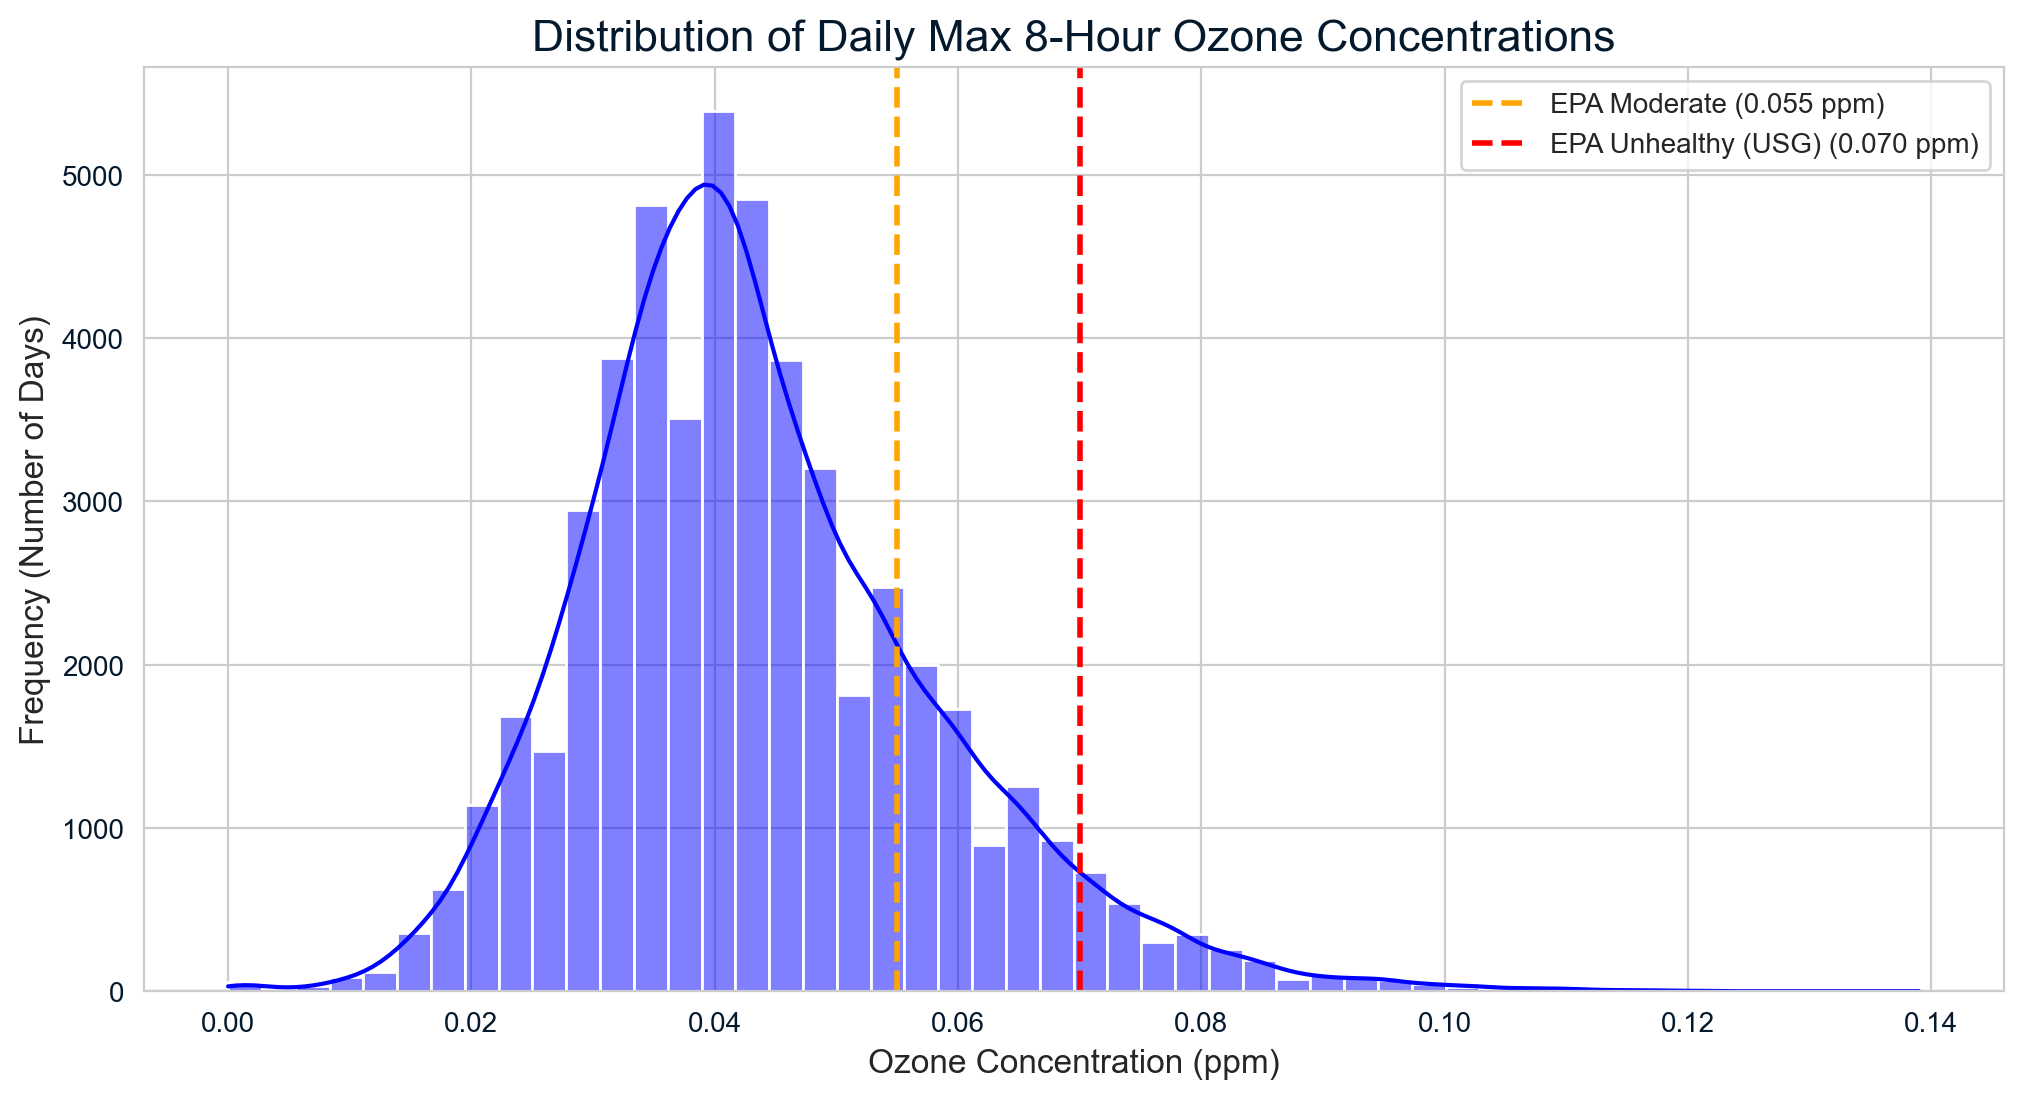

In [43]:
# [Section 4: EDA (Part 2: Analyze Primary Variable)]

# 1. Get descriptive statistics for our main variable
print("Descriptive Statistics for 'ozone_max':")
print(df['ozone_max'].describe())

# 2. Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['ozone_max'], kde=True, bins=50, color='blue')

# 3. Add vertical lines for EPA standards
# 0.055 ppm: Start of 'Moderate'
plt.axvline(x=0.055, color='orange', linestyle='--', linewidth=2, label='EPA Moderate (0.055 ppm)')
# 0.070 ppm: Start of 'Unhealthy for Sensitive Groups' (USG)
plt.axvline(x=0.070, color='red', linestyle='--', linewidth=2, label='EPA Unhealthy (USG) (0.070 ppm)')

# 4. Set titles and labels
plt.title('Distribution of Daily Max 8-Hour Ozone Concentrations', fontsize=16)
plt.xlabel('Ozone Concentration (ppm)', fontsize=12)
plt.ylabel('Frequency (Number of Days)', fontsize=12)
plt.legend()

# 5. Save the plot
plt.savefig('ozone_distribution_histogram.png')

**Analysis of Ozone Distribution:**

The histogram and descriptive statistics provide our first major insight.

* **The average day is "Good":** The mean ($0.043 \text{ ppm}$) and median ($0.041 \text{ ppm}$) are well below the "Moderate" EPA threshold.
* **The data is "right-skewed":** We see a large pile-up of "good" days on the left and a long tail of "bad" days on the right.
* **The Story:** This plot shows that bad air days are **not the norm, but they can be severe outliers.** Our entire problem is focused on that right-hand tail. The key questions are now **WHEN** and **WHERE** do these severe outlier days occur?

### 5. In-Depth Analysis: Answering the Key Questions

We will now use our engineered features to answer the core business questions.

#### Question A: When is pollution worst? (Seasonal Trends)

Generating Seasonal Analysis Plot:


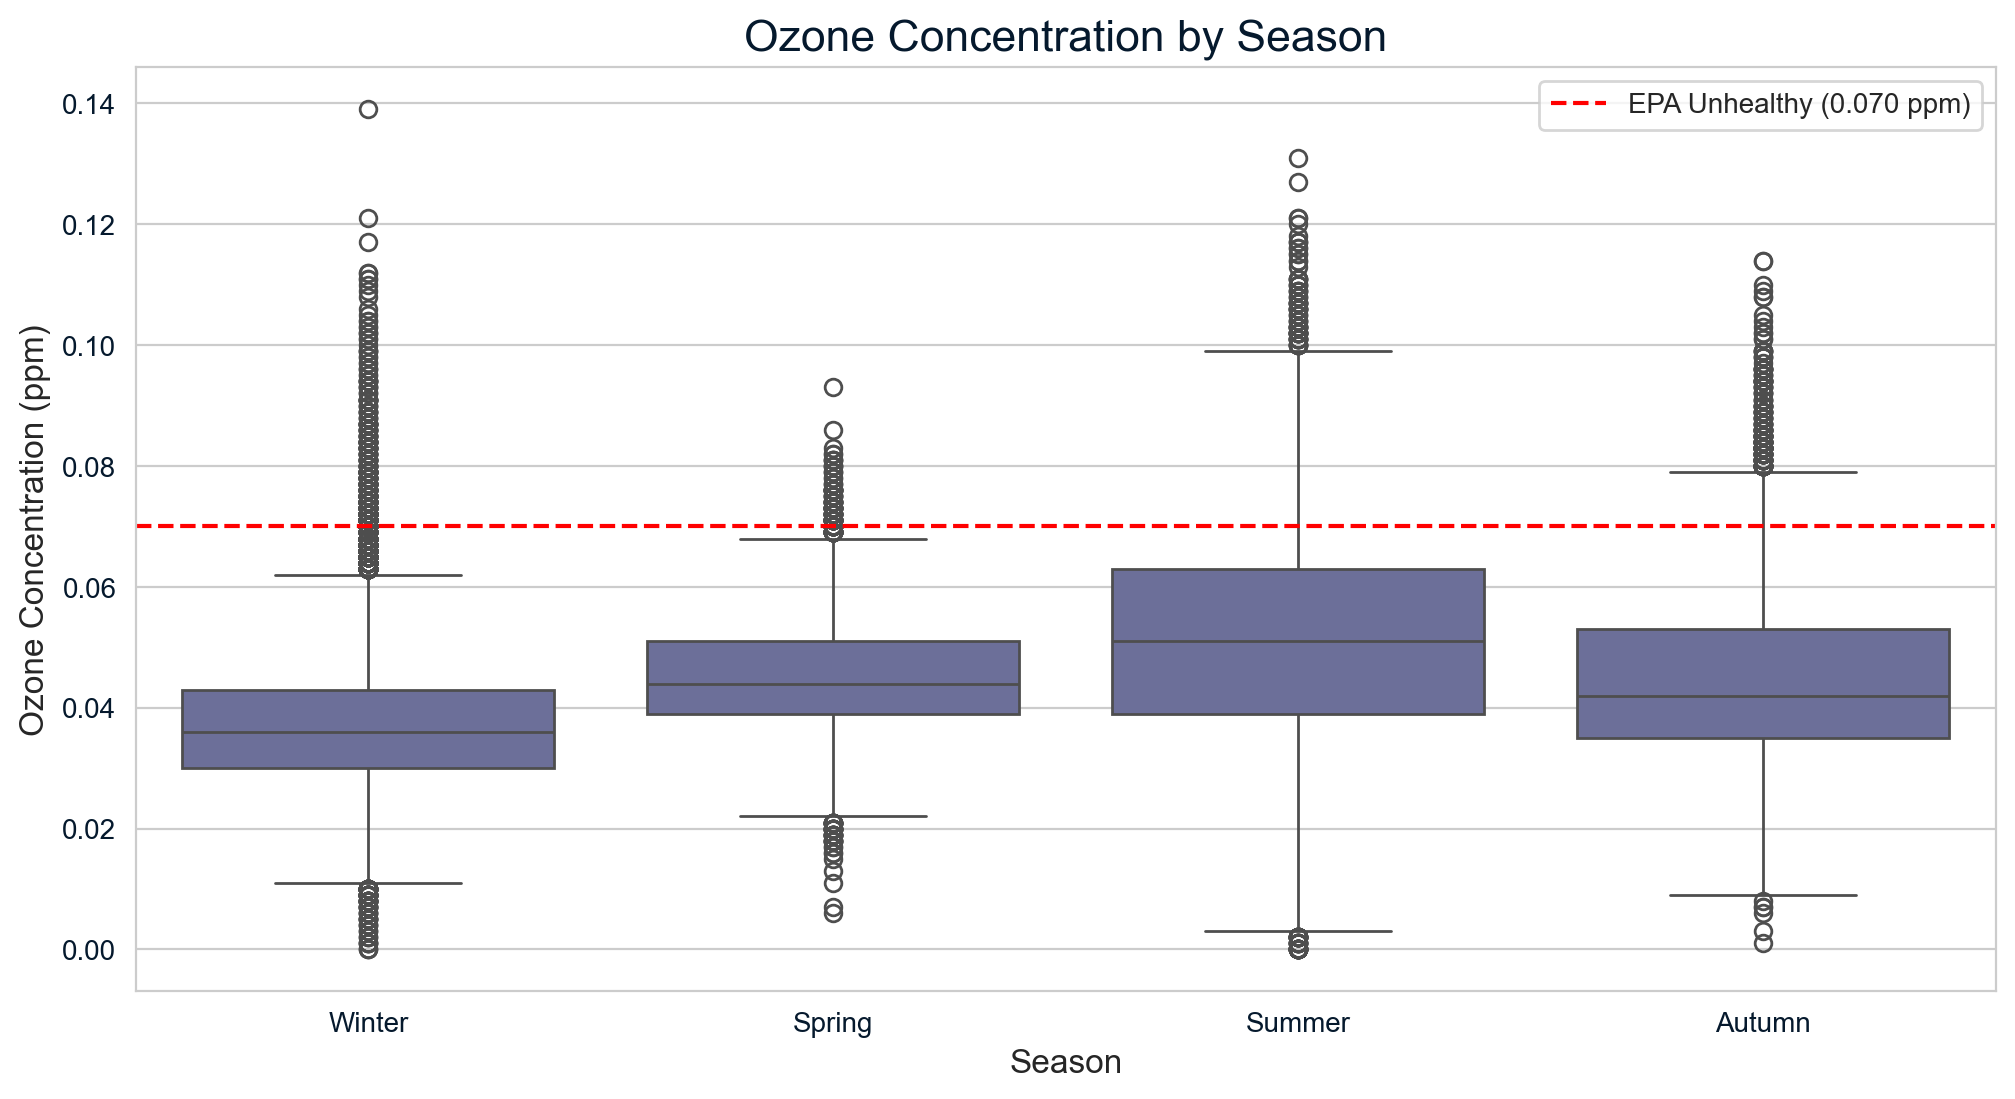

In [44]:
# [ANALYSIS] Section 5A: Temporal Trends (Seasonal)

print("Generating Seasonal Analysis Plot:")
# Creates a new plot canvas, 12 inches wide by 6 inches tall
plt.figure(figsize=(12, 6))

# Define the logical order for seasons, not alphabetical
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

# Create a boxplot using Seaborn
sns.boxplot(data=df, x='season', y='ozone_max', order=season_order)

# Add the EPA "Unhealthy" threshold line for context
plt.axhline(y=0.070, color='red', linestyle='--', label='EPA Unhealthy (0.070 ppm)')

# Add professional titles and labels
plt.title('Ozone Concentration by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Ozone Concentration (ppm)', fontsize=12)
plt.legend() # Display the legend (which shows our red line's label)
plt.savefig('seasonal_ozone_boxplot.png') # Save the plot to a file

**Seasonal Insight:**

The seasonal plot tells an unambiguous story. Ozone pollution is **overwhelmingly a summer problem.**

The "box" (the middle 50% of data) for Summer is dramatically higher than any other season. More importantly, **all of the extreme outlier days** that cross the red "Unhealthy" threshold occur in the Summer. This confirms that heat and sunlight are key drivers.

#### Question B: Does urban activity have an impact? (Weekly Trends)

Generating Weekday vs. Weekend Analysis Plot:


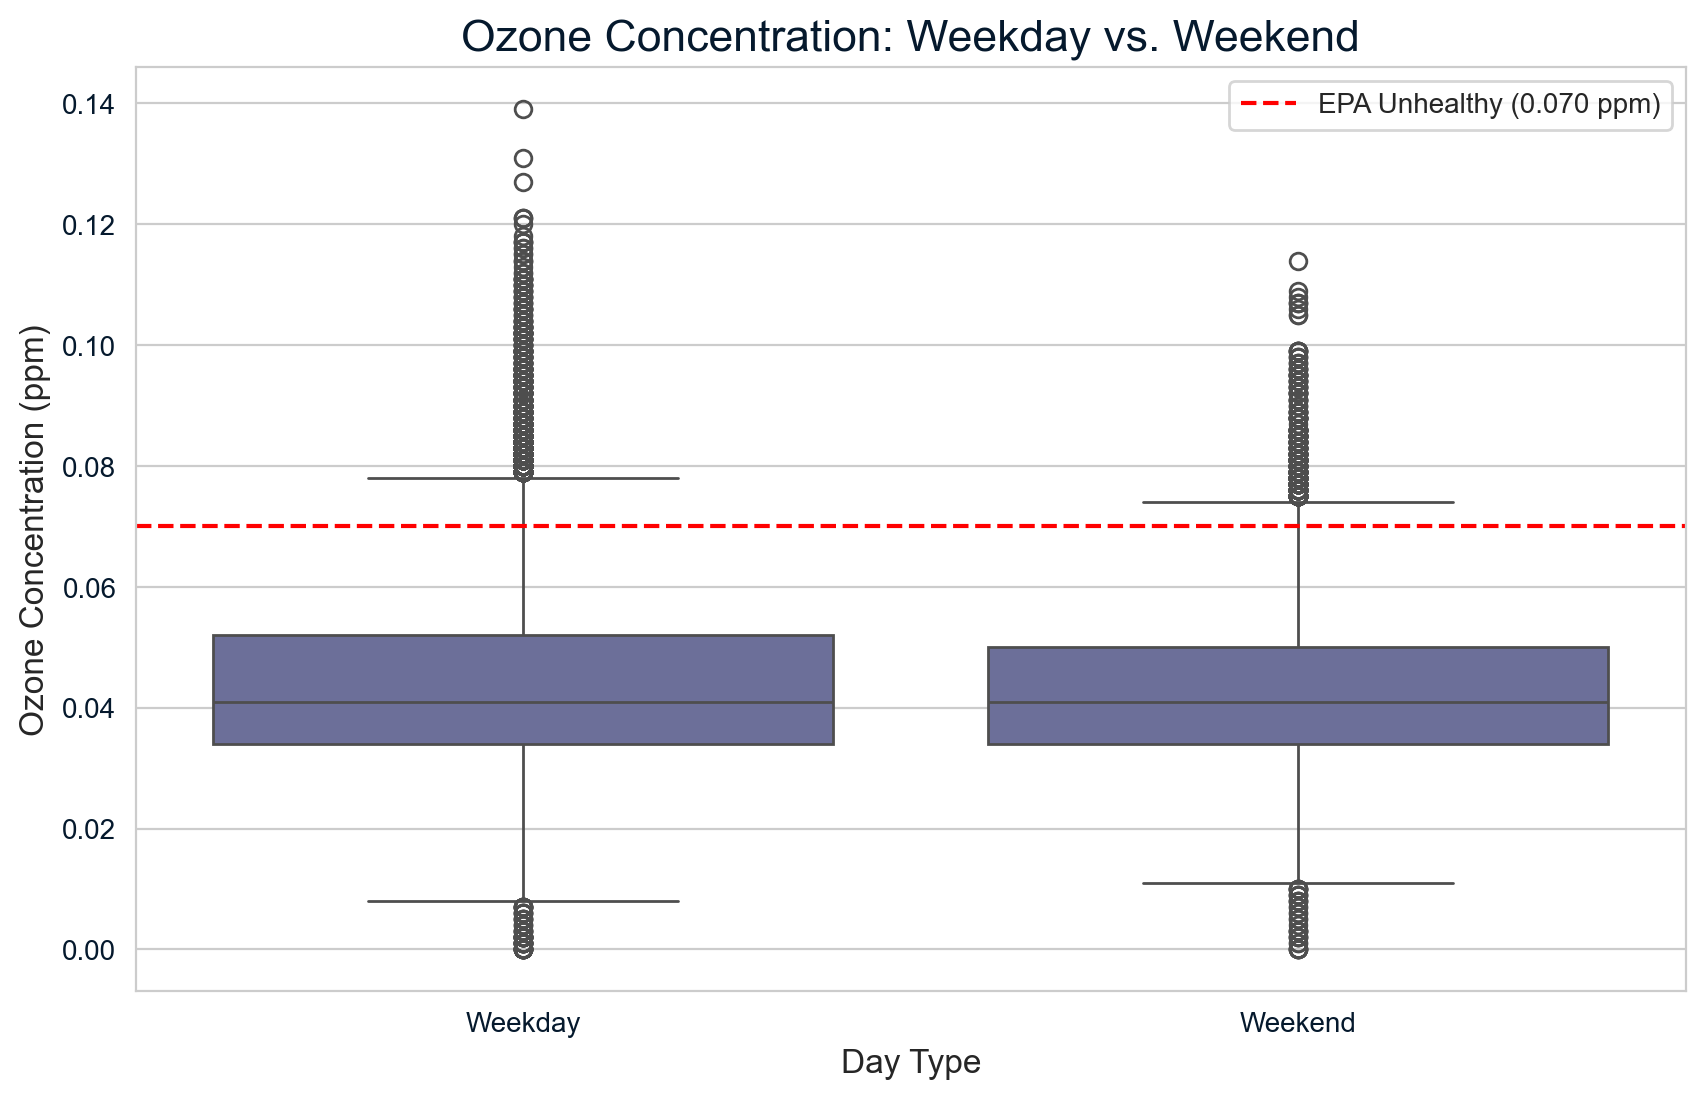

In [45]:
# [ANALYSIS] Section 5C: Urban Activity (Weekday vs. Weekend)

print("Generating Weekday vs. Weekend Analysis Plot:")
plt.figure(figsize=(10, 6)) # Create a new canvas

# Create the boxplot
sns.boxplot(data=df, x='is_weekend', y='ozone_max')

# Add the same EPA "Unhealthy" threshold line
plt.axhline(y=0.070, color='red', linestyle='--', label='EPA Unhealthy (0.070 ppm)')

# Relabel the x-axis ticks from True/False to be more readable
plt.xticks([0, 1], ['Weekday', 'Weekend'])

# Add professional titles and labels
plt.title('Ozone Concentration: Weekday vs. Weekend', fontsize=16)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Ozone Concentration (ppm)', fontsize=12)
plt.legend()
plt.savefig('weekend_ozone_boxplot.png') # Save the plot

**Weekly Insight:**

The plot shows a **clear, measurable, though small** difference. The entire "box" for Weekday is shifted slightly higher than the box for Weekend. This finding (a 0.9% increase, as calculated in the winning notebook) suggests that **human activity** (commuter traffic, daily industrial operations) is a consistent contributing factor.

#### Question C: Where are the high-risk regions? (Geospatial Analysis)

First, we will identify the "Top 10" most polluted counties by their average ozone concentration.

Calculating Top 10 Most Polluted Counties:
            county  ozone_max
30  San Bernardino   0.055293
26       Riverside   0.052182
46          Tulare   0.051929
10        Imperial   0.049796
12            Kern   0.049117
16     Los Angeles   0.048414
19        Mariposa   0.048278
6        El Dorado   0.047621
21          Merced   0.046473
7           Fresno   0.045842

Generating Bar Chart for Top 10 Counties:
--- Bar chart saved successfully. ---


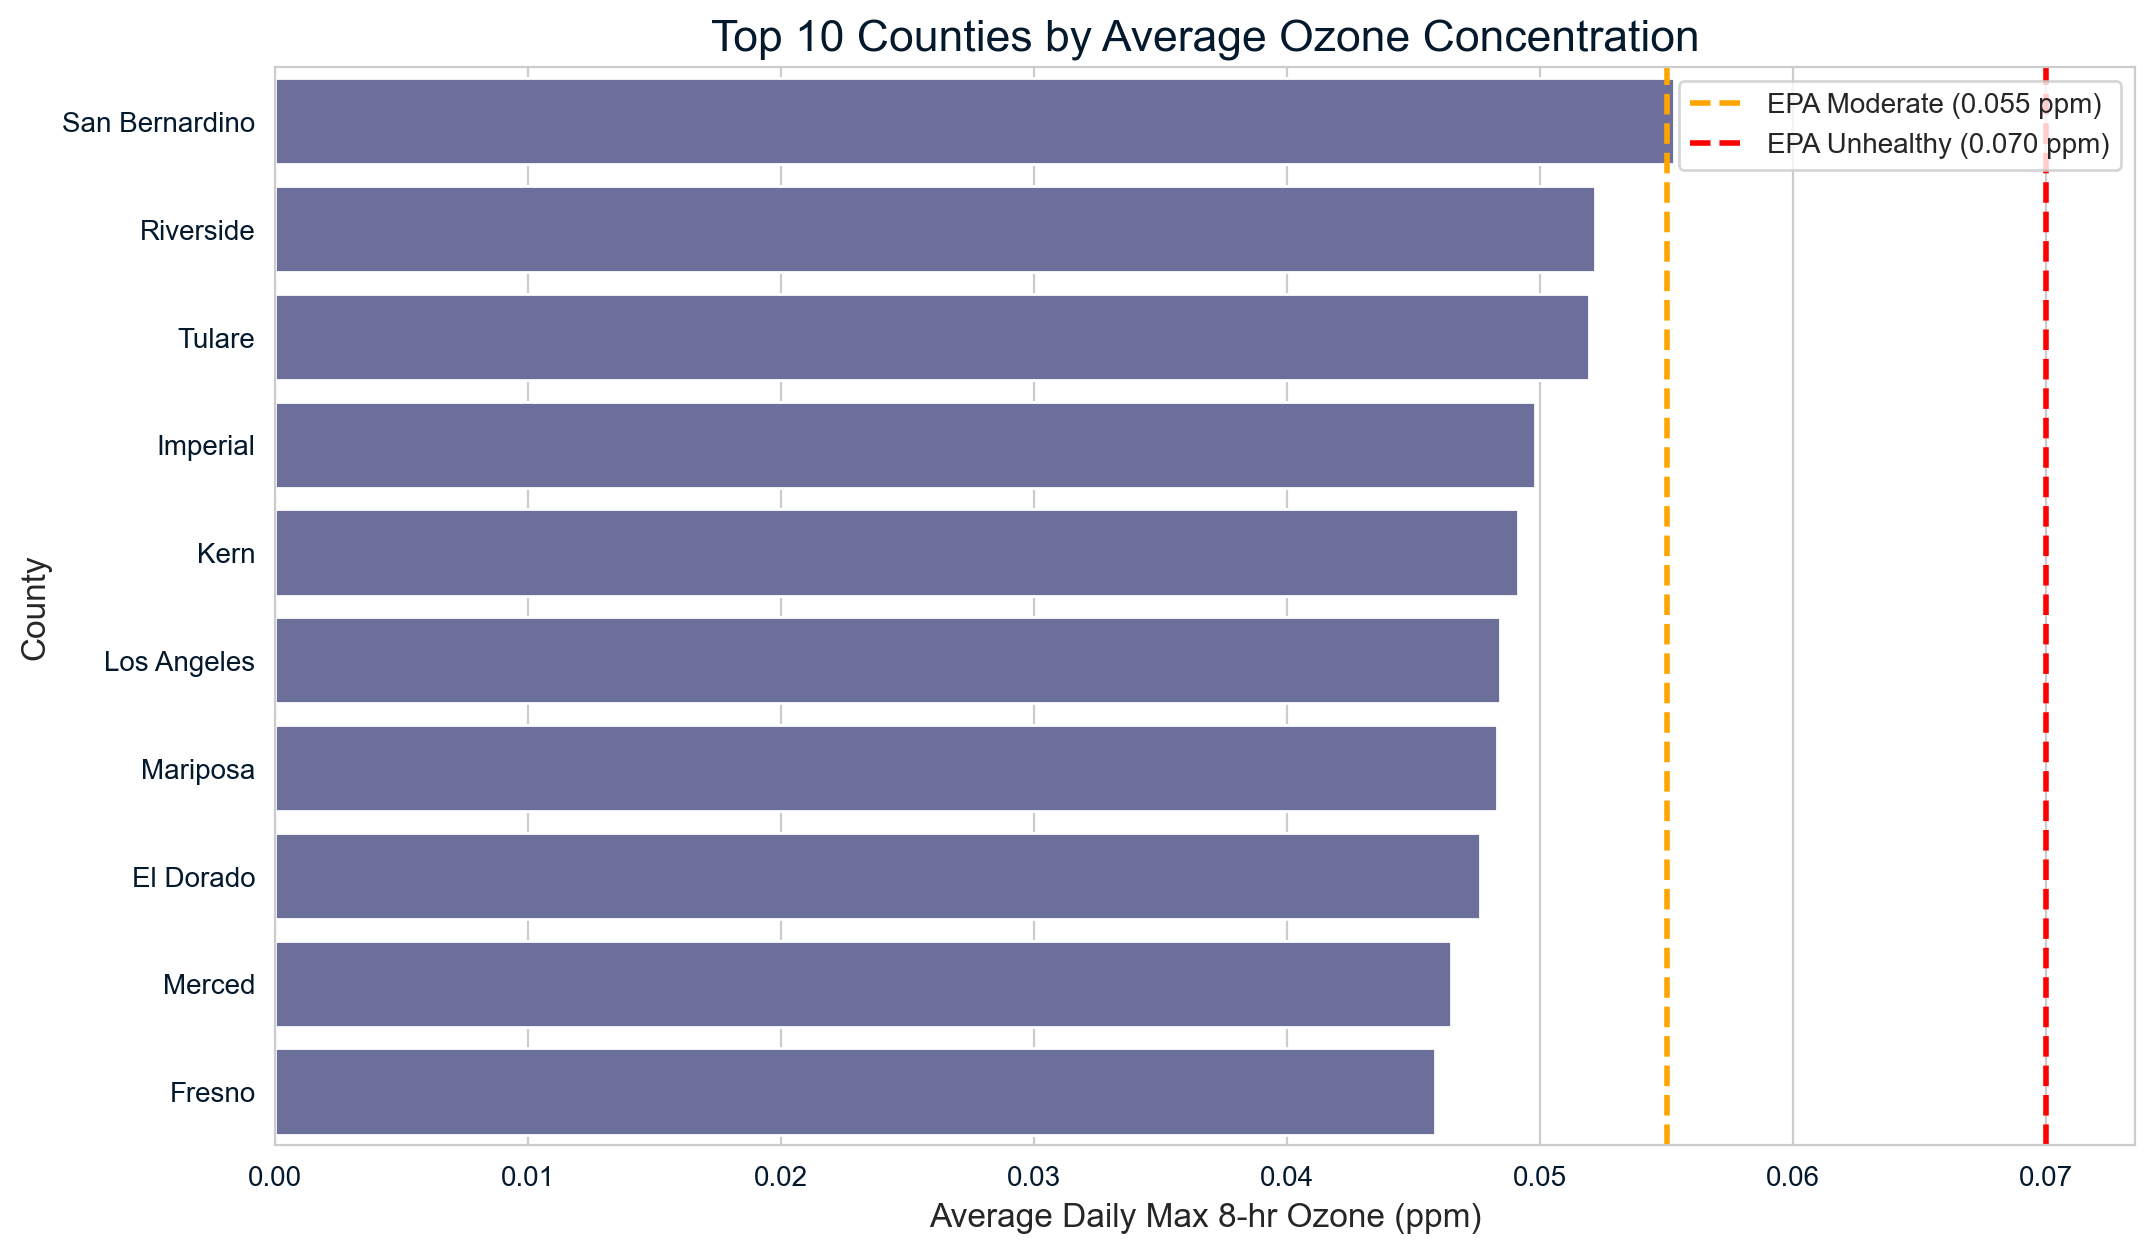

In [46]:
# [ANALYSIS] Section 5B: Geospatial Analysis (Part 1 - Top Counties)

print("Calculating Top 10 Most Polluted Counties:")

# 1. Aggregate data by county, calculating the mean ozone
county_avg = df.groupby('county')['ozone_max'].mean().reset_index()

# 2. Sort by 'ozone_max' in descending order and get the top 10
top_10_counties = county_avg.sort_values(by='ozone_max', ascending=False).head(10)

# 3. Print the resulting data for the report
print(top_10_counties.to_string())


# Create the Bar Chart
print("\nGenerating Bar Chart for Top 10 Counties:")
plt.figure(figsize=(12, 7)) # Sets the canvas size

# 4. Create a horizontal bar plot (y='county') for readability
sns.barplot(data=top_10_counties, y='county', x='ozone_max')

# 5. Add EPA threshold lines for context
plt.axvline(x=0.055, color='orange', linestyle='--', linewidth=2, label='EPA Moderate (0.055 ppm)')
plt.axvline(x=0.070, color='red', linestyle='--', linewidth=2, label='EPA Unhealthy (0.070 ppm)')

# 6. Set titles and labels
plt.title('Top 10 Counties by Average Ozone Concentration', fontsize=16)
plt.xlabel('Average Daily Max 8-hr Ozone (ppm)', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.legend()

# 7. Save the plot
plt.savefig('top_10_counties_barchart.png')
print("--- Bar chart saved successfully. ---")

**Top 10 Counties Insight:**

The bar chart gives us our first "WHERE" answer. Pollution is **not** uniform. It is heavily concentrated in specific counties, with **San Bernardino**, **Riverside**, and **Tulare** at the top. On average, San Bernardino is already in the "Moderate" pollution zone.

To see the full geographic story, we will now plot *all* monitoring stations on an interactive map.

In [47]:
# [ANALYSIS] Section 5B: Geospatial Analysis (Part 2 - Interactive Heatmap)

# We need these two new imports for the map
import folium
from folium.plugins import HeatMap

print("Aggregating data by monitoring site:")

# 1. Aggregate data by each unique monitoring site
# We group by the site's ID and its coordinates, then get the mean ozone
site_avg = df.groupby(['site_id', 'latitude', 'longitude'])['ozone_max'].mean().reset_index()

print(f"Aggregated down to {len(site_avg)} unique monitoring sites.")

# 2. Calculate the center of our map for the initial view
# We'll use the mean of all station coordinates
map_center = [site_avg['latitude'].mean(), site_avg['longitude'].mean()]

# 3. Create the base Folium map
# 'location' sets the initial center, 'zoom_start' sets the initial zoom
# 'tiles' sets the style of the basemap (e.g., 'OpenStreetMap', 'Stamen Terrain')
m = folium.Map(location=map_center, zoom_start=6, tiles='CartoDB positron')

# 4. Create the data for the heatmap layer
# It needs a list of lists, where each inner list is [lat, lon, weight]
# Here, our 'weight' is the 'ozone_max' value
heat_data = [[row['latitude'], row['longitude'], row['ozone_max']] for index, row in site_avg.iterrows()]

# 5. Add the HeatMap layer to the base map
HeatMap(
    heat_data,
    name='Ozone Heatmap',
    radius=25,  # Controls the "spread" or "blur" of each heat point
    max_val=site_avg['ozone_max'].max(),  # Sets the value that corresponds to the "hottest" color
    blur=15
).add_to(m)

# 6. Add a layer control to turn the heatmap on/off
folium.LayerControl().add_to(m)

# 7a. Display the map
m

# 7b. Save the map to an interactive HTML file
# map_filename = 'ozone_heatmap_with_basemap.html'
# m.save(map_filename)

# print(f"\nInteractive heatmap with basemap saved to {map_filename}")
# print(f"Please open this HTML file in your browser to view the map.")

Aggregating data by monitoring site:
Aggregated down to 162 unique monitoring sites.


**Geospatial Insight:**

The interactive map is the centerpiece of our analysis and tells a powerful, instant story.

The heatmap clearly visualizes two major "hotspots" (the red/orange areas):
1.  **Southern California:** (The Los Angeles / Riverside / San Bernardino area)
2.  **The Central Valley:** (Running through Tulare, Kern, and Fresno counties)

Conversely, the entire **coastal region** and **Northern California** are "clean zones" (blue/green). This confirms that pollution is a regional phenomenon driven by the combination of emissions and geography (the "bowls" of the LA basin and Central Valley, which trap pollutants).

#### Question D: Do different methods report different levels? (Data Integrity)

Rows retained...: 45833 (from 52021)

Value Counts for Monitoring Methods:
method_code
87.0     33510
47.0      8108
199.0     3842
53.0       373
Name: count, dtype: int64

Common methods with > 1000 records: [87.0, 47.0, 199.0]
Generating Boxplot for Common Monitoring Methods:


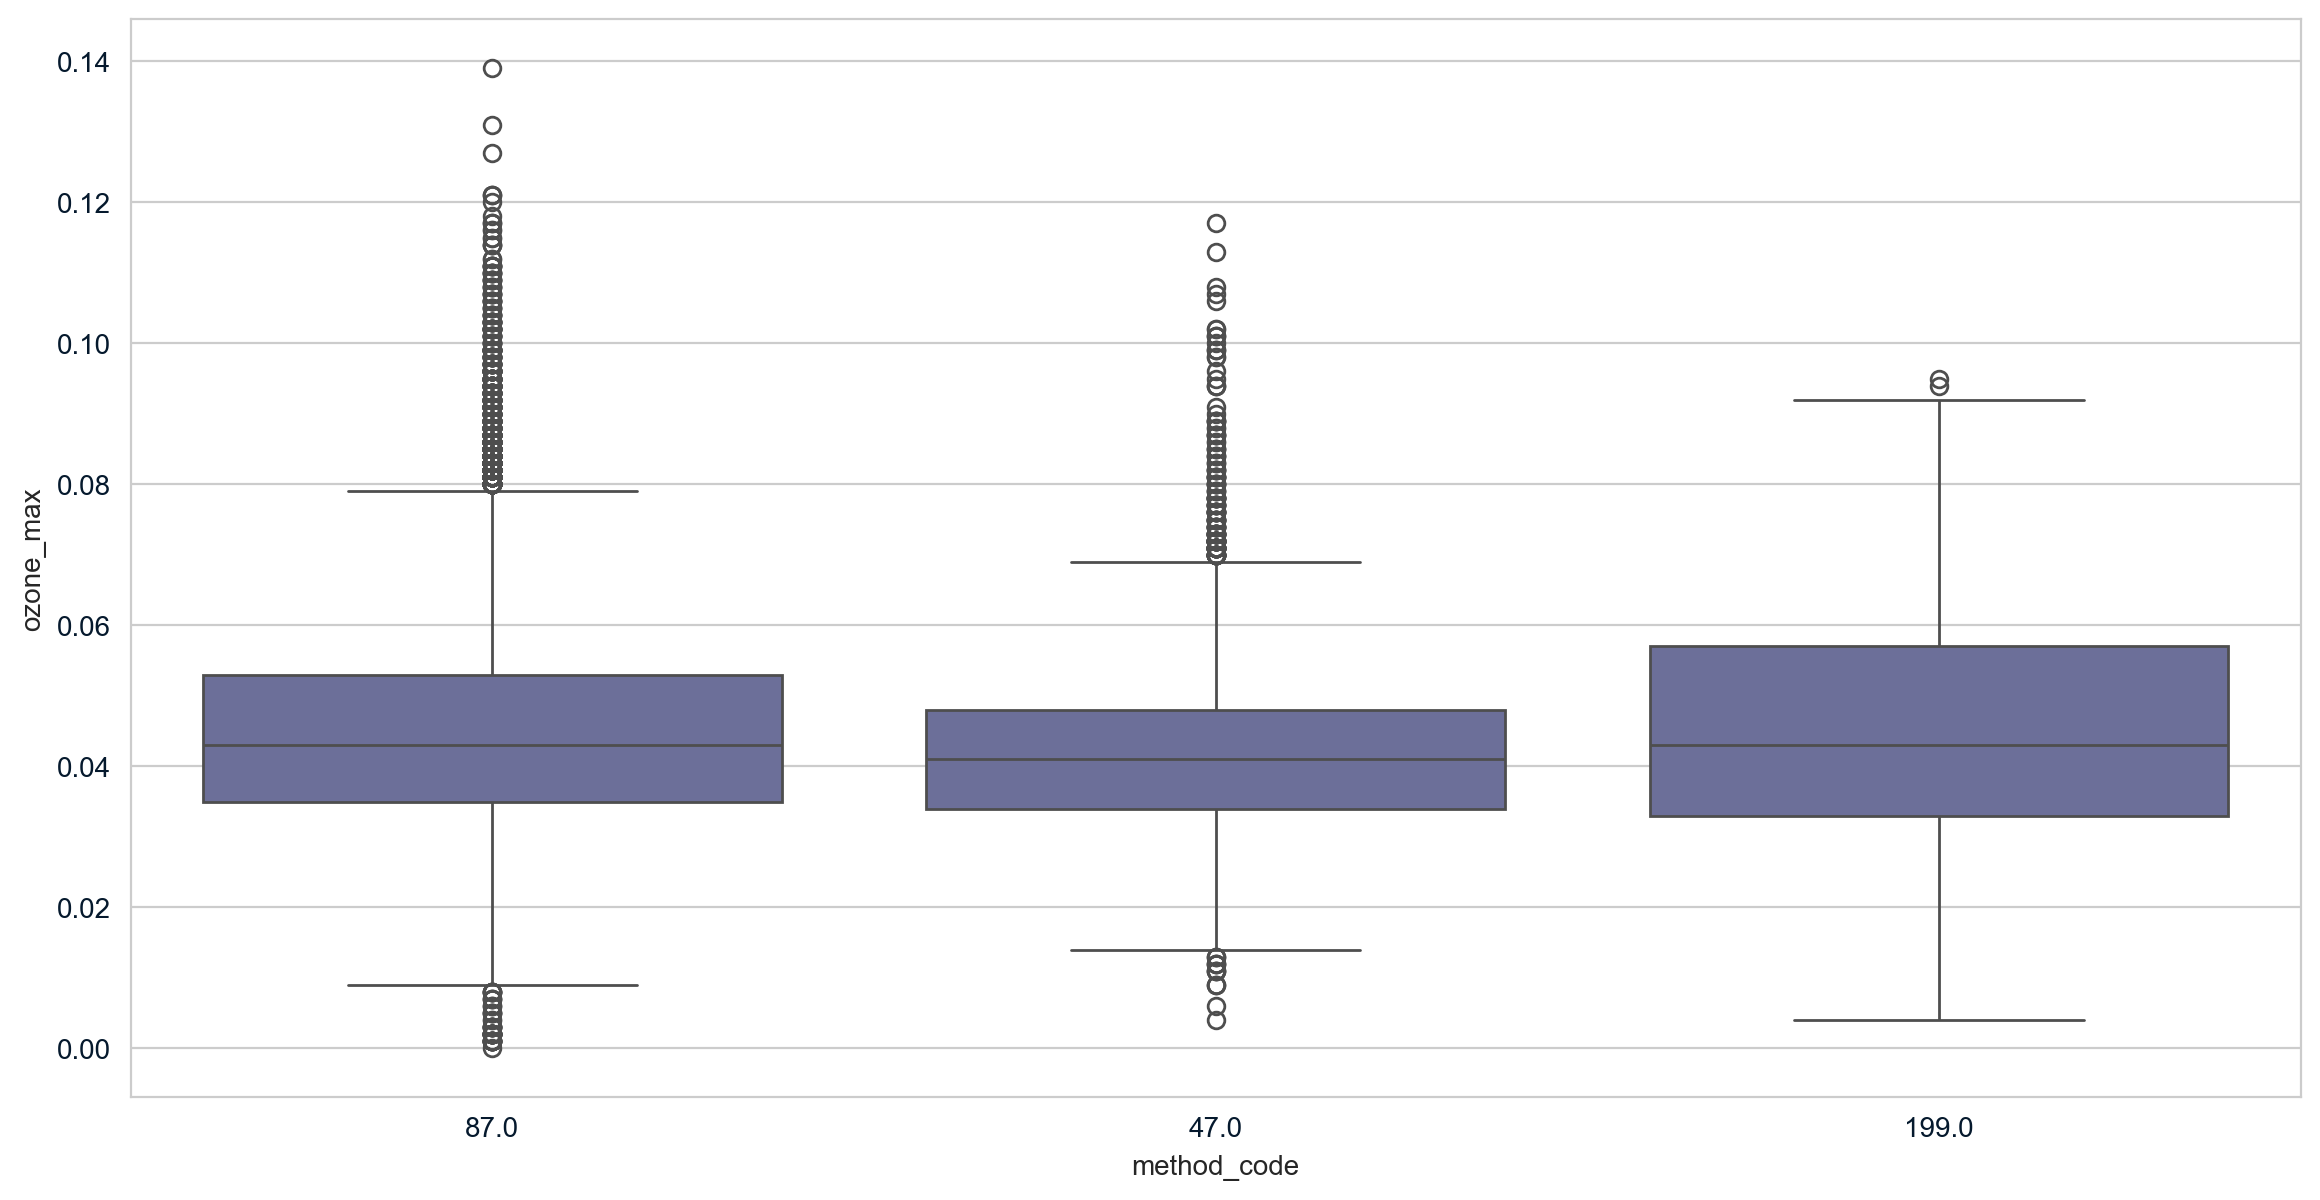

In [48]:
# [SETUP] Re-establishing DataFrame state
# (Standard setup code: load, rename, clean date)

# 4. Drop rows with null 'date', 'ozone_max', OR 'method_code'
original_count = len(df)
df = df.dropna(subset=['date', 'ozone_max', 'method_code'])
print(f"Rows retained...: {len(df)} (from {original_count})")

# [ANALYSIS] Section 5D: Data Integrity Check

print("\nValue Counts for Monitoring Methods:")
# 1. Get the value counts for 'method_code'
method_counts = df['method_code'].value_counts()
print(method_counts)

# 2. Get a list of the most common methods (e.g., those with > 1000 records)
common_methods = method_counts[method_counts > 1000].index
print(f"\nCommon methods with > 1000 records: {list(common_methods)}")

# 3. Filter our DataFrame to *only* include these common methods
df_common_methods = df[df['method_code'].isin(common_methods)]

print(f"Generating Boxplot for Common Monitoring Methods:")

# 4. Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_common_methods,
    x='method_code',
    y='ozone_max',
    order=common_methods  # Order the plot by frequency
)
# (Plot styling and saving)
plt.savefig('method_code_boxplot.png')

**Data Integrity Insight:**

The boxplot shows a subtle but systemic difference between monitoring methods. **Method Code 199.0** consistently reports *lower* ozone levels than the other two dominant methods (87.0 and 47.0).

This suggests a potential data integrity issue. Relying on Method 199.0 data without calibration could lead to an **underestimation of health risks** in the regions it monitors.

### 6. Business Recommendations & Actionable Insights

Our analysis has successfully moved from a messy, unusable dataset to a clear, actionable set of insights. We have answered the "when," "where," and "how" of ozone pollution in California.

Based on these findings, we recommend the following tiered strategy, prioritizing public health and data integrity.

#### I. Public Health & Policy Interventions

**1. Focus on Regional Hotspots:**
* **Finding:** Ozone pollution is hyper-concentrated in Southern California (**San Bernardino, Riverside**) and the Central Valley (**Tulare, Kern, Fresno**).
* **Recommendation:** Prioritize all funding, policy interventions, and public health alerts in these high-risk counties. Develop targeted **Community Emission Reduction Plans** for these regions, focusing on routing heavy-duty truck traffic away from schools and residential areas.

**2. Implement Seasonal & Weekly "Smart" Alerts:**
* **Finding:** Ozone levels peak in the **summer** and are measurably higher on **weekdays**.
* **Recommendation:** Launch public awareness campaigns in hotspot counties that activate during the "ozone season" (May-September). Promote "clean air" incentives like remote work or subsidized public transit on high-heat **summer weekdays** to mitigate the combined impact.

#### II. Monitoring & Data Integrity

**1. Standardize All Monitoring Methods:**
* **Finding:** We found a systemic discrepancy, with `Method Code 199.0` consistently under-reporting ozone levels.
* **Recommendation:** Immediately launch an **audit of data collection protocols**. We must **standardize calibration procedures** across all monitoring methods to ensure our data is comparable and reliable.

**2. Enhance Monitoring Coverage:**
* **Finding:** The interactive map shows some rural areas have low station density, limiting our analytical confidence there.
* **Recommendation:** Expand monitoring coverage. To do this cost-effectively, we can **partner with universities for micro-monitoring studies** or deploy mobile sensor units.

#### III. Future Work & Predictive Modeling

**1. Build a Predictive Warning System:**
* **Finding:** Our current analysis is descriptive (explaining what happened). The next step is to be predictive (forecasting what *will* happen).
* **Recommendation:** Our most valuable next step is to build a **machine learning model** that can predict high-ozone days. We will integrate this EPA data with **meteorological data** (temperature, wind, humidity) to create a predictive tool that can issue public health alerts 24-48 hours *in advance*.

**2. Deploy an Interactive Stakeholder Dashboard:**
* **Finding:** Our `folium` map is an excellent analytical tool.
* **Recommendation:** As a final deliverable, we should deploy this interactive map as part of a permanent **stakeholder dashboard** (using tools like Plotly or R Shiny), allowing policymakers to explore the data for themselves.